# Importy

In [4]:
import pandas as pd
import numpy as np
import random as random
# plot
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
#preprocessing
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#modelování
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
#import pickle
#vyhodnocení
#from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# Načíst data

In [29]:
# prompt: open file
# import os

with open('jena_climate_2009_2016.csv', 'r') as file:
  df = file.read(1200)
  print(df)


"Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,

In [30]:
# data ze souboru jena_climate_2009_2016.csv do datasetu
df = pd.read_csv('jena_climate_2009_2016.csv')
df.head(10)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


# Preprocesing dat a vizualizace dat


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [32]:
# statistiky datasetu df
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


Test převodu objektu na datetime

In [33]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

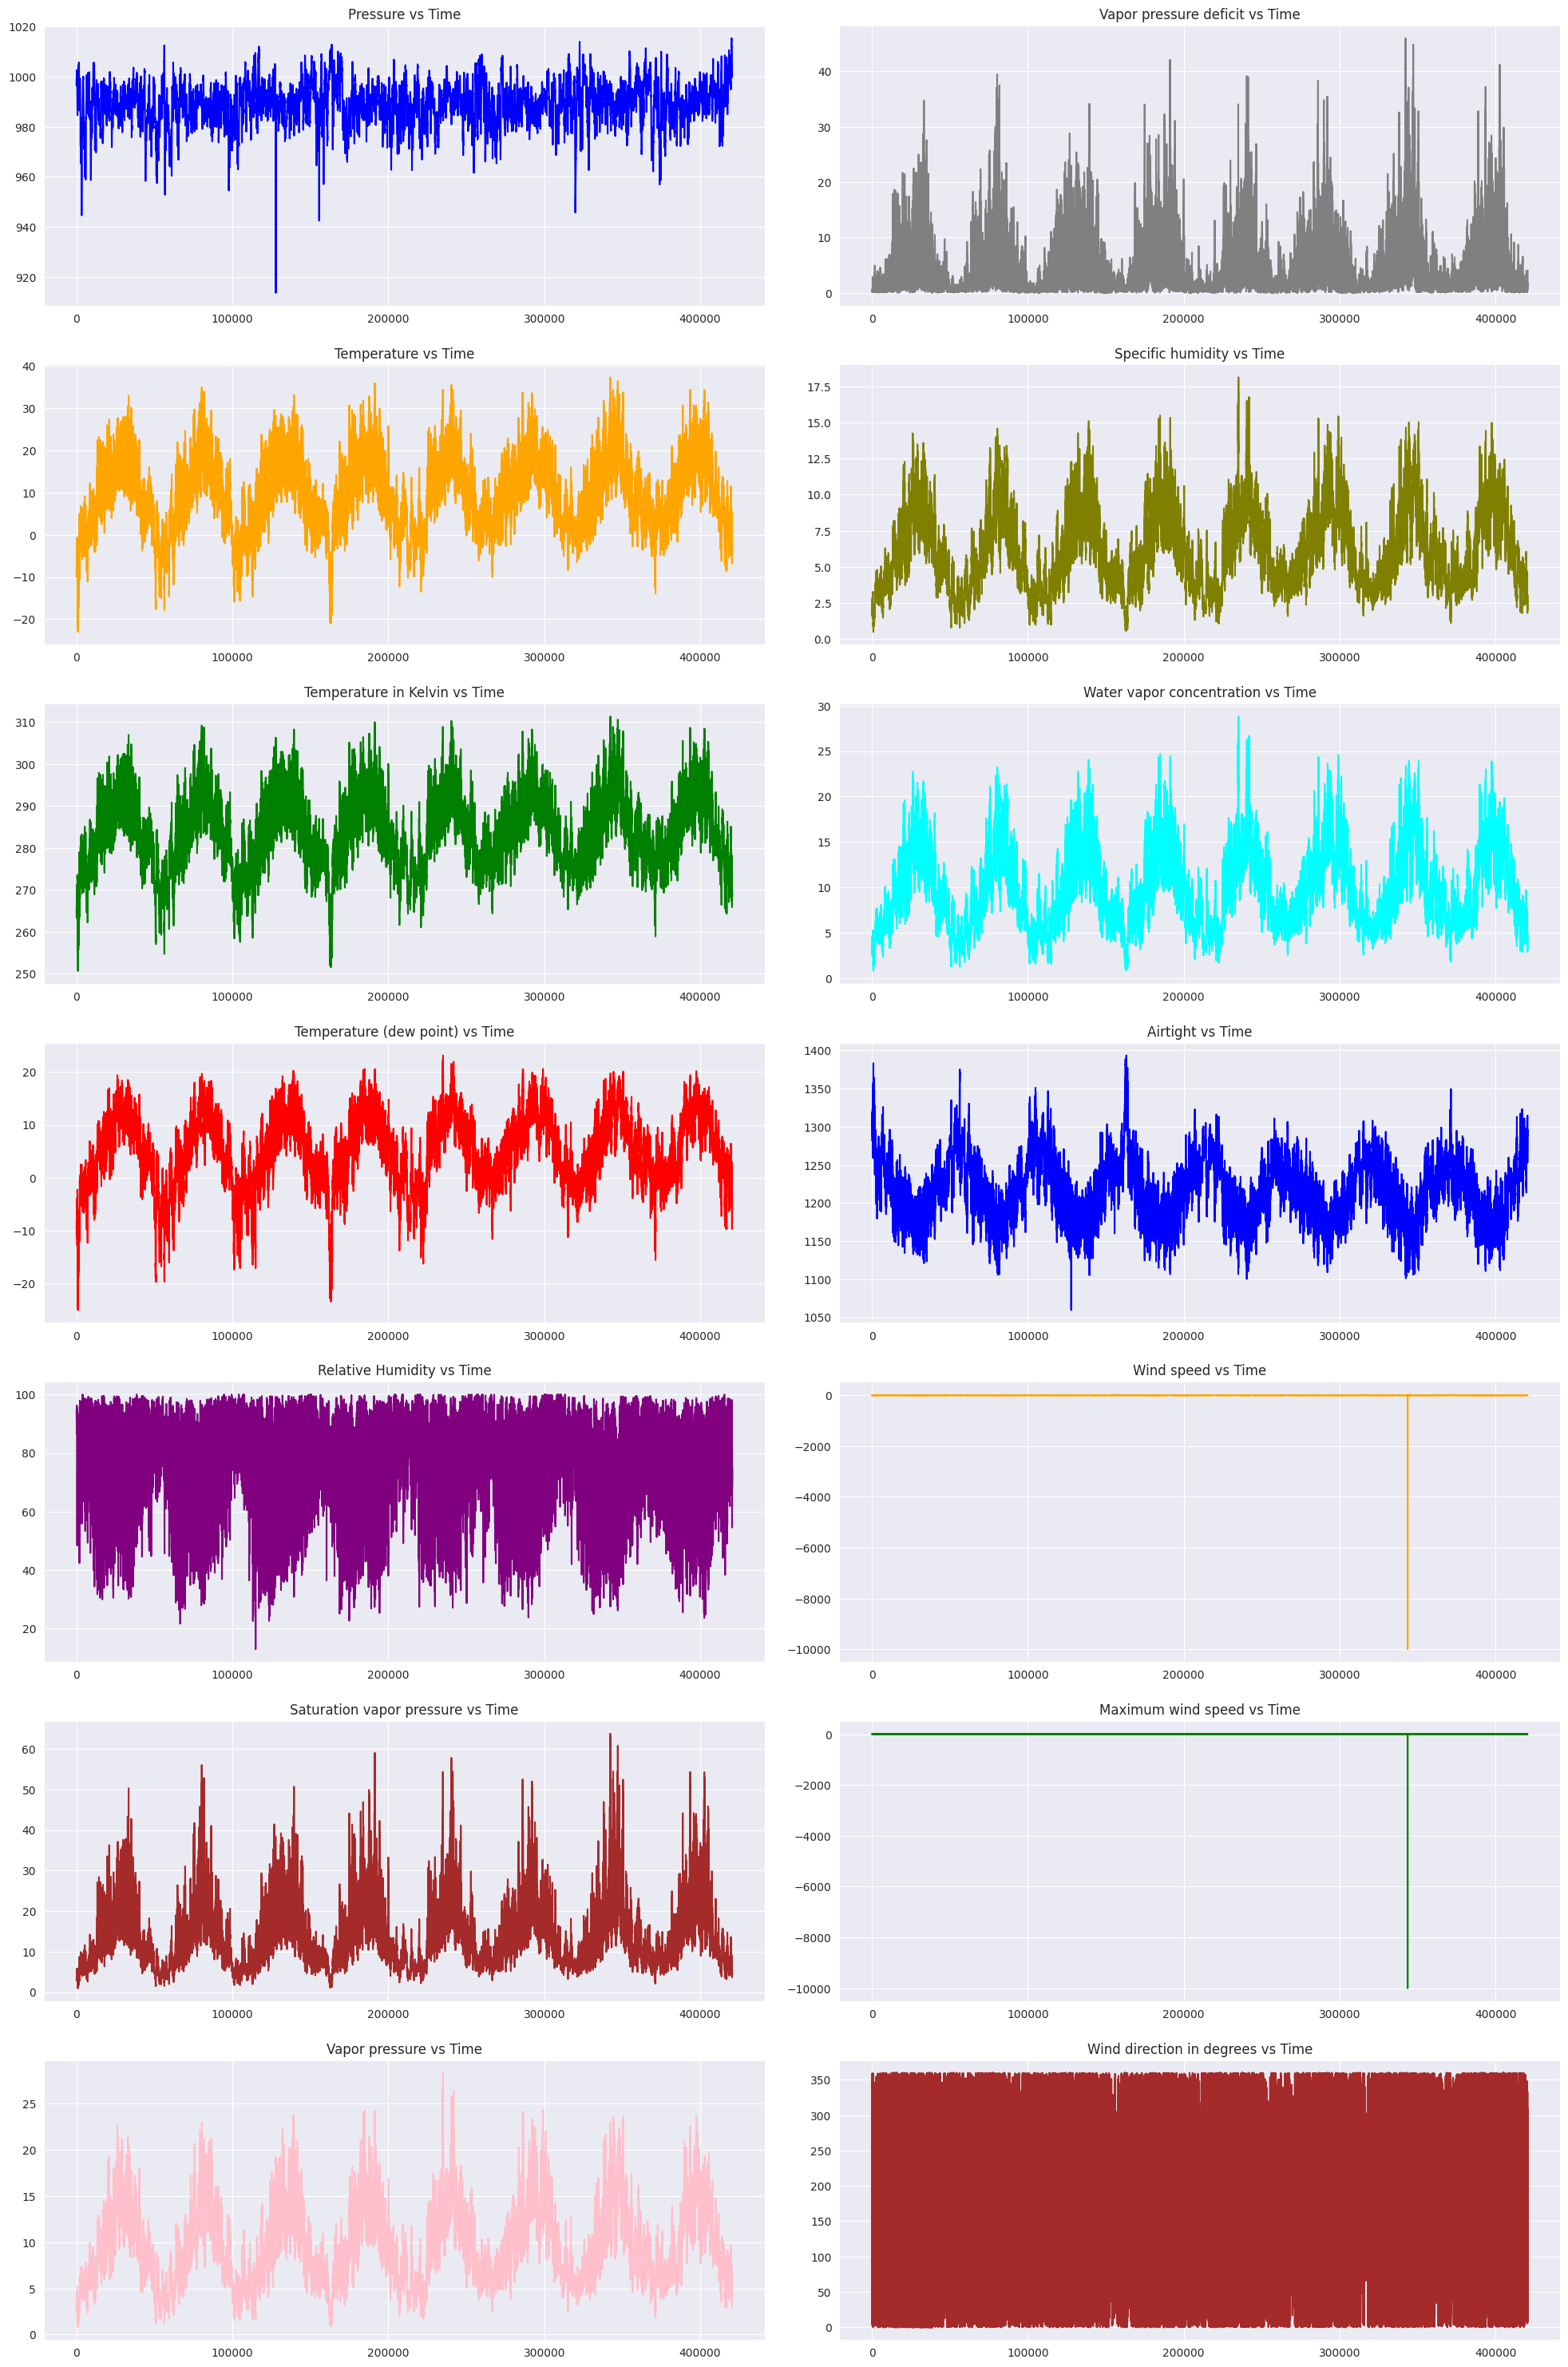

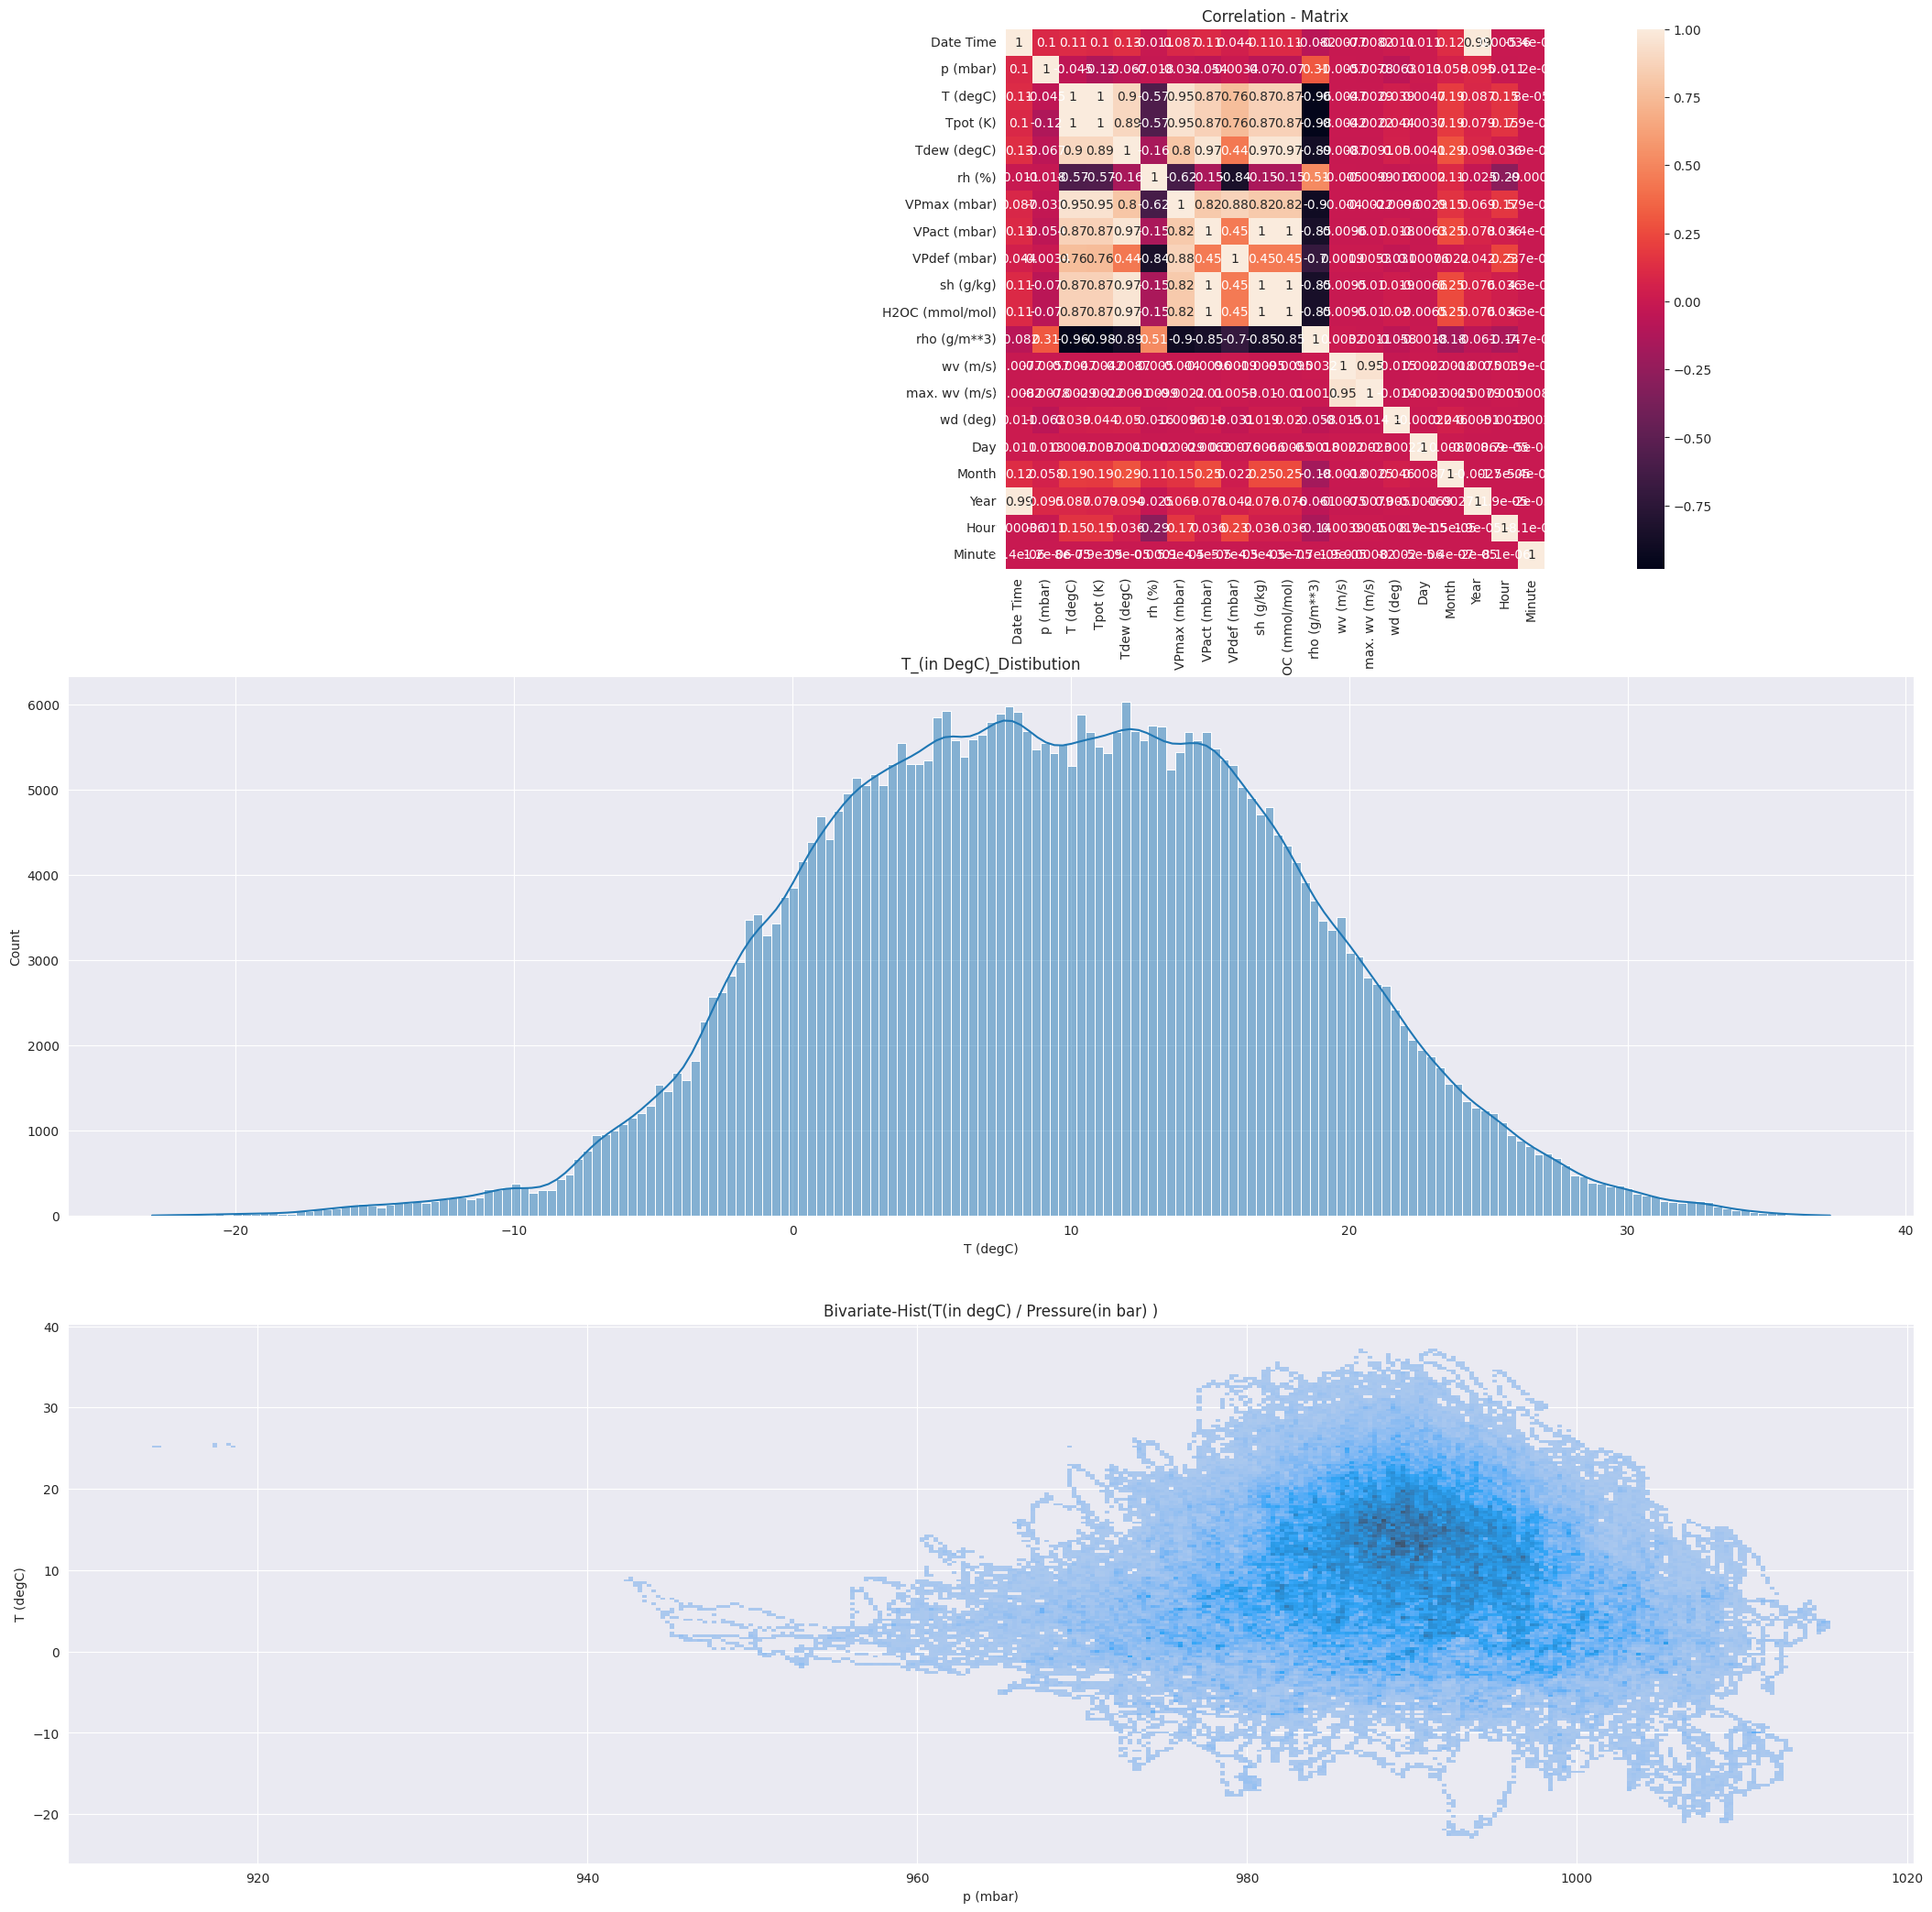

In [34]:
all_cols = df.columns
sns.set_style('darkgrid')
fig, axs = plt.subplots(7, 2, figsize=(20,30))

titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "brown",
]

for i in range(len(titles)):

    if i<= 6:
        axs[i,0].set_title(f'{titles[i]} vs Time');
        axs[i,0].plot(range(len(df[all_cols[0]])), df[all_cols[i+1]],c = colors[i])
    if i > 6:
        axs[i-7,1].set_title(f'{titles[i]} vs Time');
        axs[i-7,1].plot(range(len(df[all_cols[0]])), df[all_cols[i+1]],c = colors[i])


plt.tight_layout(pad=2)
plt.show()

fig, ax = plt.subplots(3,1, figsize = (26,26))

# Convert 'Date Time' column to datetime objects
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Extract relevant features from datetime
# df['Day'] = df['Date Time'].dt.day
# df['Month'] = df['Date Time'].dt.month
# df['Year'] = df['Date Time'].dt.year
# df['Hour'] = df['Date Time'].dt.hour
# df['Minute'] = df['Date Time'].dt.minute

df_corr = df.corr()
ax[0].set_title('Correlation - Matrix')
sns.heatmap(df_corr, square=True, annot=True, ax=ax[0])

ax[1].set_title('T_(in DegC)_Distibution')
sns.histplot(df[all_cols[2]], ax = ax[1], kde =True)

ax[2].set_title('Bivariate-Hist(T(in degC) / Pressure(in bar) )')
sns.histplot(
    df, x=all_cols[1], y=all_cols[2],
    discrete=(False, False), log_scale=(False, False), ax= ax[2]
)

plt.show()

In [35]:
# null hodnoty v datasetu df
df.isnull().sum()
#df[df.isnull().any(axis=1)].groupby("T (degC)")["type"].count()

,0
Date Time,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0


0       -8.02
1       -8.41
2       -8.51
3       -8.31
4       -8.27
        ...  
1435   -10.66
1436   -10.43
1437   -10.90
1438   -10.87
1439   -10.75
Name: T (degC), Length: 1440, dtype: float64


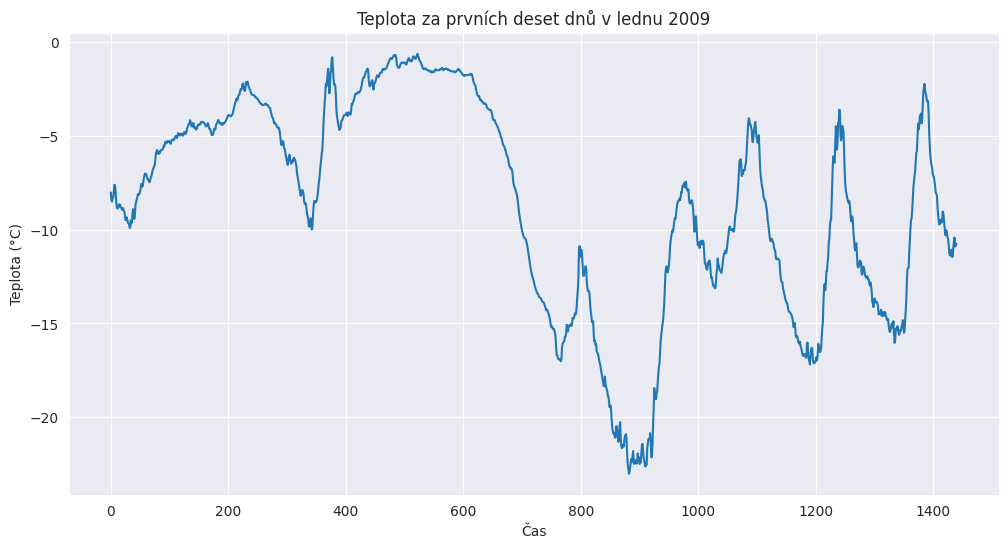

In [36]:
# graf závislosti teploty na čase za deset dnů
import matplotlib.pyplot as plt

temp = df['T (degC)'][:1440]
print(temp)

plt.figure(figsize=(12, 6))
plt.plot(temp)
plt.xlabel('Čas')
plt.ylabel('Teplota (°C)')
plt.title('Teplota za prvních deset dnů v lednu 2009')
plt.show()


0      -8.02
1      -8.41
2      -8.51
3      -8.31
4      -8.27
        ... 
4459   -2.77
4460   -2.84
4461   -2.90
4462   -2.93
4463   -2.97
Name: T (degC), Length: 4464, dtype: float64


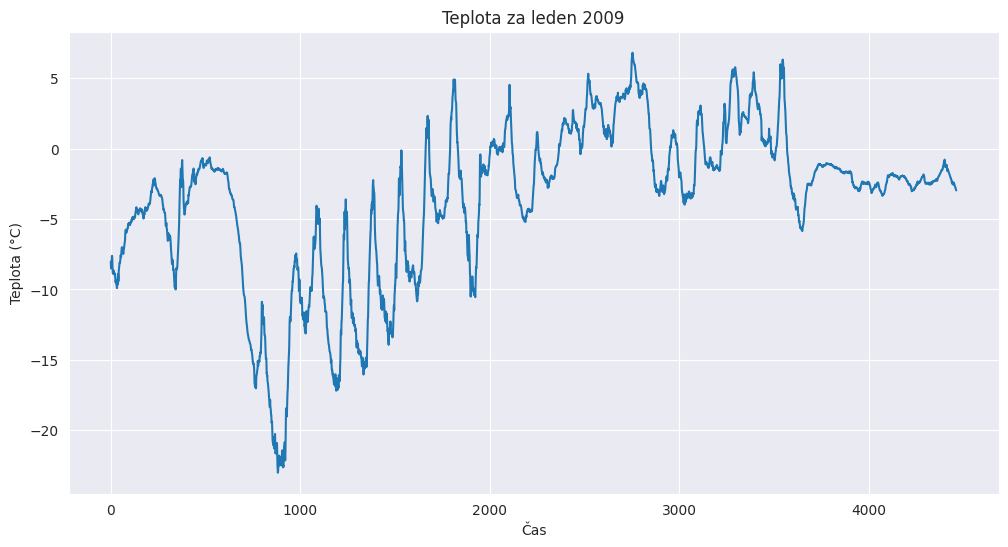

In [37]:
temp = df['T (degC)'][:4464]
print(temp)

plt.figure(figsize=(12, 6))
plt.plot(temp)
plt.xlabel('Čas')
plt.ylabel('Teplota (°C)')
plt.title('Teplota za leden 2009')
plt.show()

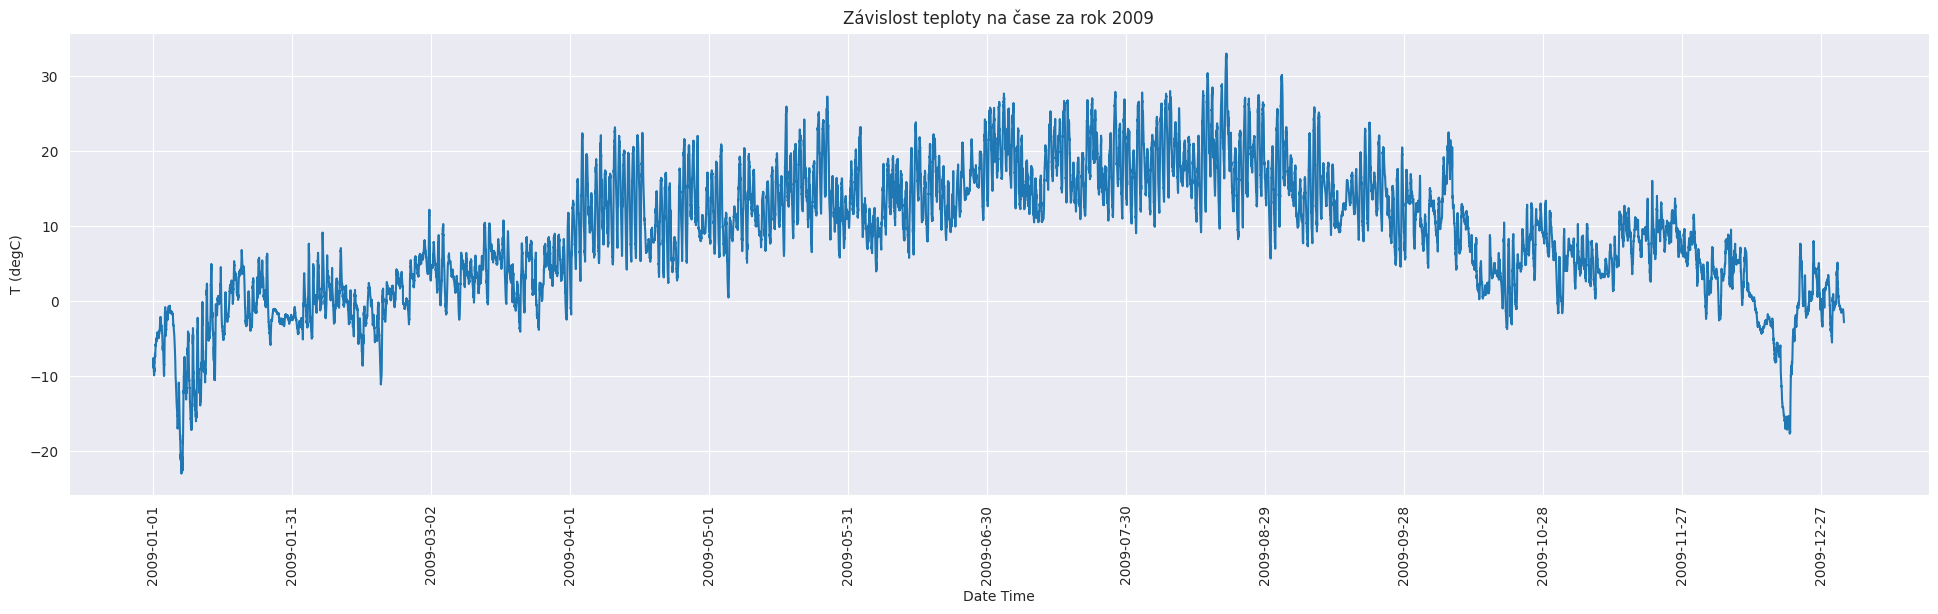

In [38]:
# nakresli graf závislosti [T (degC)] na [Date Time]

import matplotlib.pyplot as plt

# Vyberte sloupce pro graf
x = df['Date Time'][:52558]
y = df['T (degC)'][:52558]

# Vytvořte graf
plt.figure(figsize=(24, 6))
plt.plot(x, y)
plt.xlabel('Date Time')
plt.ylabel('T (degC)')
plt.title('Závislost teploty na čase za rok 2009')
plt.xticks(x[::4320],rotation=90)  # Otočte popisky na ose x pro lepší čitelnost
plt.show()


In [42]:
# Normalizace sloupce 'T (degC)'
df['T (degC)'] = (df['T (degC)'] - df['T (degC)'].min()) / (df['T (degC)'].max() - df['T (degC)'].min())
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Day,Month,Year,Hour,Minute
0,2009-01-01 00:10:00,996.52,0.248632,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,1,1,2009,0,10
1,2009-01-01 00:20:00,996.57,0.242163,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,1,1,2009,0,20
2,2009-01-01 00:30:00,996.53,0.240504,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,1,1,2009,0,30
3,2009-01-01 00:40:00,996.51,0.243822,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,1,1,2009,0,40
4,2009-01-01 00:50:00,996.51,0.244485,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,1,1,2009,0,50
5,2009-01-01 01:00:00,996.50,0.248134,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,1,1,2009,1,0
6,2009-01-01 01:10:00,996.50,0.255266,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5,1,1,2009,1,10
7,2009-01-01 01:20:00,996.50,0.255266,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6,1,1,2009,1,20
8,2009-01-01 01:30:00,996.50,0.250456,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5,1,1,2009,1,30
9,2009-01-01 01:40:00,996.53,0.241831,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0,1,1,2009,1,40


In [44]:
from tensorflow import keras
from tensorflow.keras import layers

# Vytvoření sekvence čísel
int_sequence = np.arange(10)

# Vytvoření časové řady datového souboru
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

#Iterace přes datový soubor a tisk vstupů a cílů

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

# Definice modelu
model = keras.Sequential([
    layers.LSTM(10, activation='relu', input_shape=(3, 1)),
    layers.Dense(1)
])

# Kompilace modelu
model.compile(optimizer='adam', loss='mse')

# Příprava dat pro trénování
X = []
y = []
for inputs, targets in dummy_dataset:
    X.extend(inputs)
    y.extend(targets)

X = np.array(X)
y = np.array(y)

# Reshape vstupních dat pro LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Trénování modelu
model.fit(X, y, epochs=200, verbose=0)

# Předpověď
predictions = model.predict(X, verbose=0)
for i in range(len(X)):
    print(f"Vstup: {X[i].flatten()}, Skutečný cíl: {y[i]}, Předpověď: {predictions[i][0]}")

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Vstup: [0 1 2], Skutečný cíl: 3, Předpověď: 1.3307794332504272
Vstup: [1 2 3], Skutečný cíl: 4, Předpověď: 2.478212833404541
Vstup: [2 3 4], Skutečný cíl: 5, Předpověď: 3.977968692779541
Vstup: [3 4 5], Skutečný cíl: 6, Předpověď: 5.80348539352417
Vstup: [4 5 6], Skutečný cíl: 7, Předpověď: 7.900542736053467


**Model**

# Dummy model jako reference

In [43]:
def predict(seed, x_test, yreal):
    c = seed
    kx = x_test[c,:,1].tolist() ## every 120/seq_length time-steps / point is going to have a single future point (here T in C on of the the given features)
    pred = model.predict(x_test)
    ky = yreal[c]
    x_lin = range(len(kx))
    plt.plot(x_lin, kx, '.-b', label = 'Test_data_past' )
    plt.plot(x_lin[-1]+1, ky, 'kx', label = 'Real_point')
    plt.plot(x_lin[-1]+1, pred[c], 'ro', label ='Predicted_point' )
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('Norm_Temp_(in DegC)')
    plt.title('Prediction_on_Test_Data')
    plt.show()

batch_size = 128
seed = 10
num = 5

x_test, yreal = next(test_gen)
print('x-test: ', x_test.shape, 'yreal: ', yreal.shape)

for _ in range(num):
    seed = random.randint(0, batch_size-2)
    predict(seed, x_test, yreal)

x-test:  (128, 120, 7) yreal:  (128,)


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 7 and 1 for '{{node sequential_6_1/lstm_6_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_6_1/lstm_6_1/strided_slice_1, sequential_6_1/lstm_6_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [32,7], [1,40].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(32, 7), dtype=float32)
  • states=('tf.Tensor(shape=(32, 10), dtype=float32)', 'tf.Tensor(shape=(32, 10), dtype=float32)')
  • training=False

# RNN (Recurrent Neural Network) model

In [45]:
# Rekurentní neuronové sítě (RNN) jsou typem umělých neuronových sítí, které jsou navrženy pro zpracování sekvenčních dat.
# Na rozdíl od běžných neuronových sítí, které zpracovávají data v jednom průchodu, RNN zpracovávají data přes více časových kroků.
# To jim umožňuje uchovávat informace z předchozích vstupů a využívat je při aktuálním zpracování12.
# RNN jsou zvláště užitečné pro úlohy, kde je důležitý kontext a pořadí dat, jako je rozpoznávání řeči, zpracování přirozeného
# jazyka a predikce časových řad12.
# Existují různé typy RNN:

# 1. Jednoduché RNN: Základní forma RNN, která může trpět problémem mizejícího gradientu.
# 2. LSTM (Long Short-Term Memory): Typ RNN, který řeší problém mizejícího gradientu a je schopen uchovávat informace po delší dobu.
# 3. GRU (Gated Recurrent Unit): Podobné LSTM, ale s jednodušší strukturou


df_train = df[['p (mbar)','T (degC)', 'VPmax (mbar)', 'VPdef (mbar)', 'sh (g/kg)' ,'rho (g/m**3)',	'wv (m/s)']] #Selected Features

# převádí DataFrame df_train z knihovny pandas na numpy pole.
# Funkce to_numpy() je metoda pandas DataFrame, která vrací obsah DataFrame jako numpy pole.
# To může být užitečné, pokud chcete provádět numerické operace nebo trénovat modely strojového učení, které očekávají vstupní data ve formátu numpy pole.

data = df_train.to_numpy()
print(data.shape)

def norm(data):
    mean = data[:200000].mean(axis=0)
    data -= mean
    std = data[:200000].std(axis=0)
    data /= std

    return data

data = norm(data)
print(data.shape)

def gen(data, past, delay, minn, maxx, shuffle=False, batch_size=128, rate=6):
    if maxx is None:
        maxx = len(data) - delay -1
    i = minn + past
    while True:
        if shuffle:
            rows = np.random.randint(minn + past, maxx, size = batch_size)
        else:
            if i + batch_size > maxx:
                i = minn + past
            rows=np.arange(i, min(i + batch_size, maxx))
            i+=len(rows)

        samples = np.zeros((len(rows), past // rate, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - past, rows[j], rate) ## sample apoint every hour intead of every 10 mins
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

(420551, 7)
(420551, 7)


In [46]:
past = 720 ## ==>> looks 5 days back
rate = 6 ## ==>> sample 1 point every hour
delay = 144 ## ==>> predict after 1 day/24 hrs

train_split, test_split = 0.60, 0.25
train_max = round(train_split * data.shape[0])
val_max = (1-train_split)*data.shape[0]
test_max = round(test_split*val_max)
val_max = round(val_max - test_max)

val_steps =  (train_max+val_max) - (train_max+1) - past ## (-past) because no target values for last  720 points
test_steps = (train_max+val_max+test_max)-(train_max+val_max+1) - past

print('Train_Max: ',round(train_max),', Val_Max: ',round(val_max),', Test_Max: ',round(test_max))

train_gen = gen(data, past,delay, minn = 0, maxx = train_max, batch_size=128, shuffle=True)
val_gen = gen(data, past, delay, minn = train_max+1, maxx = train_max + val_max, batch_size=128)
test_gen = gen(data, past, delay, minn = train_max+val_max+1, maxx = train_max+val_max+test_max, batch_size=128)

Train_Max:  252331 , Val_Max:  126165 , Test_Max:  42055


In [47]:
def baseline(val_gen):
    maes = []
    for step, exe in enumerate(val_gen):
        samples, targets = exe
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds-targets))
        maes.append(mae)
        if step == 2000:
            break
    return np.mean(maes)

def visual_loss(hist, base_mae):
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(len(loss))
    sns.set_style('darkgrid')
    plt.figure()
    plt.plot(epochs, loss, "1-b", label="Training loss")
    plt.plot(epochs, val_loss, "1-r", label="Validation loss")
    plt.plot(epochs, base_mae*np.ones(len(loss)), 'k-', label = "CommonSense_Baseline_loss")
    plt.title('Loss_Curve')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [48]:
inp = tf.keras.layers.Input(shape = (past // rate, data.shape[-1]))
gru_1 = tf.keras.layers.GRU(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.3)(inp)
gru_2 = tf.keras.layers.GRU(64, activation='relu',dropout=0.1, recurrent_dropout=0.3)(gru_1)

dense = tf.keras.layers.Dense(1, activation='linear')(gru_2)
model = tf.keras.models.Model(inputs = inp, outputs = dense)

model.compile(loss="mae", optimizer="Adam")
model.summary()

se = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=5)
## steps_per_epoch
## number of batches passed during each epoch

hist = model.fit(train_gen, steps_per_epoch=500, epochs=5, validation_data = val_gen, validation_steps= val_steps, callbacks=[se])

base_mae = baseline(val_gen)
print('CommonSense_Baseline_MAE_normalized: ', base_mae)
print('CommonSense_Absoulte_MAE_(in degC)_baseline: ', base_mae*df[all_cols[2]].std(axis=0))
#visual_loss(hist, base_mae)
print()
print('--'*50)
print()
x_t, y_t = next(test_gen)
print(model.evaluate(x_t, y_t))
print('-')

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 120, 7)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 120, 32)             │           3,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,817 (89.13 KB)

 Trainable params: 22,817 (89.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 337856857899008.0000

KeyboardInterrupt: 

# ARIMA (AutoRegressive Integrated Moving Average) model

In [5]:
# ARIMA (AutoRegressive Integrated Moving Average) je třída modelů časových řad,
# která se používá k analýze a předpovědi časových řad. Model ARIMA kombinuje tři klíčové komponenty:
# 1. Autoregrese (AR): Tato část modelu předpokládá, že současná hodnota časové řady závisí na předchozích hodnotách.
# Řád autoregresní složky se označuje jako ( p ).
# 2. Integrovaná složka (I): Tato složka se používá k dosažení stacionarity časové řady, což znamená,
# že časová řada má konstantní průměr a variabilitu v čase. Řád integrační složky se označuje jako ( d ).
# 3. Klouzavý průměr (MA): Tato část modelu předpokládá, že současná hodnota časové řady závisí na předchozích chybách předpovědi.
# Řád složky klouzavého průměru se označuje jako ( q ). Celkový model ARIMA je tedy označován jako ARIMA(( p, d, q ))

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Načtení dat
data = pd.read_csv('jena_climate_2009_2016.csv', parse_dates=['Date Time'], index_col='Date Time')
temperature = data['T (degC)']


In [8]:
# Rozdělení dat
train_size = int(len(temperature) * 0.8)
train, test = temperature[:train_size], temperature[train_size:]
print('Train: ', train)
print("\n" * 2)
print('Test: ', test)


Train:  Date Time
01.01.2009 00:10:00    -8.02
01.01.2009 00:20:00    -8.41
01.01.2009 00:30:00    -8.51
01.01.2009 00:40:00    -8.31
01.01.2009 00:50:00    -8.27
                       ...  
24.05.2015 18:40:00    18.15
24.05.2015 18:50:00    18.05
24.05.2015 19:00:00    17.93
24.05.2015 19:10:00    17.73
24.05.2015 19:20:00    17.57
Name: T (degC), Length: 336440, dtype: float64



Test:  Date Time
24.05.2015 19:30:00    17.46
24.05.2015 19:40:00    17.36
24.05.2015 19:50:00    17.15
24.05.2015 20:00:00    16.92
24.05.2015 20:10:00    16.69
                       ...  
31.12.2016 23:20:00    -4.05
31.12.2016 23:30:00    -3.35
31.12.2016 23:40:00    -3.16
31.12.2016 23:50:00    -4.23
01.01.2017 00:00:00    -4.82
Name: T (degC), Length: 84111, dtype: float64


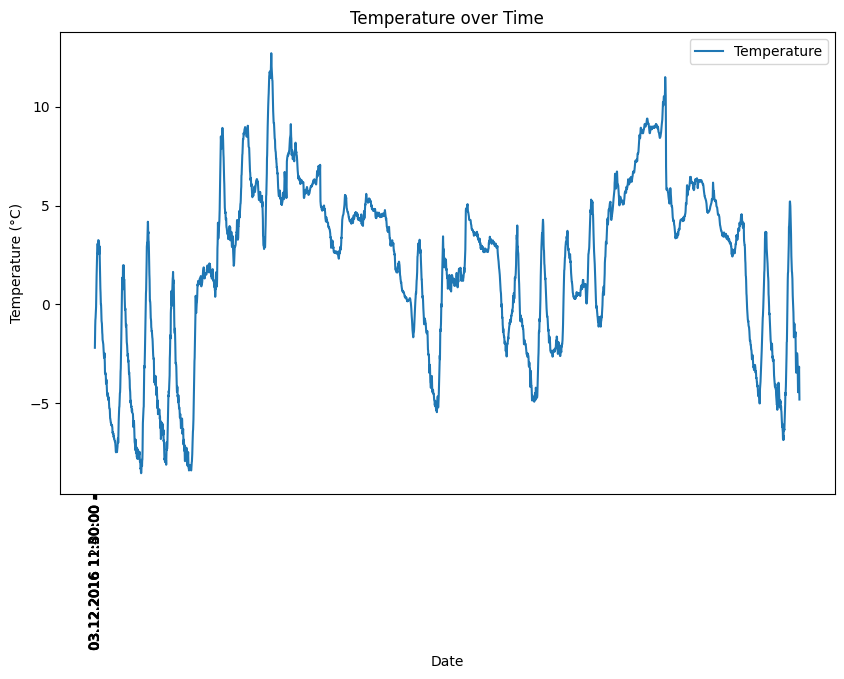

In [13]:
# Vizualizace testovacích dat
plt.figure(figsize=(10, 6))
plt.plot(temperature[80000 + train_size:], label='Temperature')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.xticks(temperature[80000 + train_size:][::540],rotation=90)
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
# Vytvoření a trénování ARIMA modelu
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Predikce
predictions = model_fit.forecast(steps=len(test))
test.index = predictions.index  # Zarovnání indexů

# Vyhodnocení modelu
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# Vizualizace predikcí
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.title('Temperature Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Mean Squared Error: 97.36911442710559


# Vyhodnocení

# Použití